In [1]:
import cv2
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

In [2]:
face_cascade = cv2.CascadeClassifier('Opencv_assets/haarcascade_frontface.xml')
eye_cascade = cv2.CascadeClassifier('Opencv_assets/haarcascade_eye.xml')

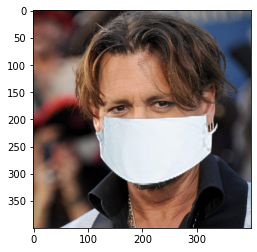

In [3]:
img=cv2.imread('Opencv_assets/Johnny-Depp-with-nose-mask.jpg')
img2=cv2.resize(img,(400,400))
plt.imshow(img2[:,:,::-1])

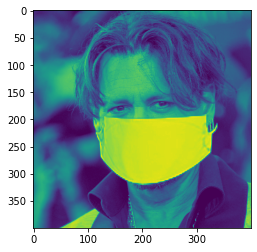

In [4]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)


## 사진 정렬


In [5]:
faces = face_cascade.detectMultiScale(gray,1.1,4) #사진정보,정밀도,얼굴 사이의 최소간격
for (x,y,w,h) in faces:
    cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),2) #cv2.rectangle(img, start, end, color, thickness)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img2[y:y+h, x:x+w]
    eyes =eye_cascade.detectMultiScale(roi_gray,1.1,4)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_gray,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
cv2.imshow('img',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
eyes

array([[121,  55,  44,  44],
       [ 44,  60,  48,  48]], dtype=int32)

In [7]:
eye_1=eyes[0]
eye_2=eyes[1]

if eye_1[0] < eye_2[0]:
    left_eye = eye_1
    right_eye = eye_2
else:
    left_eye = eye_2
    right_eye = eye_1

In [8]:
# Calculating coordinates of a central points of the rectangles
left_eye_center = (int(left_eye[0] + (left_eye[2] / 2)), int(left_eye[1] + (left_eye[3] / 2)))
left_eye_x = left_eye_center[0] 
left_eye_y = left_eye_center[1]
 
right_eye_center = (int(right_eye[0] + (right_eye[2]/2)), int(right_eye[1] + (right_eye[3]/2)))
right_eye_x = right_eye_center[0]
right_eye_y = right_eye_center[1]
 
cv2.circle(roi_gray, left_eye_center, 5, (255, 0, 0) , -1)
cv2.circle(roi_gray, right_eye_center, 5, (255, 0, 0) , -1)
cv2.line(roi_gray,right_eye_center, left_eye_center,(0,200,200),3)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 143, ...,  38,  34, 255],
       ...,
       [255, 255,   7, ...,  31,  19, 255],
       [255, 255,   8, ...,  22,  20, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [9]:
if left_eye_y > right_eye_y:
    A = (right_eye_x, left_eye_y)
   # Integer -1 indicates that the image will rotate in the clockwise direction
    direction = -1 
else:
    A = (left_eye_x, right_eye_y)
  # Integer 1 indicates that image will rotate in the counter clockwise  
  # direction
    direction = 1 

cv2.circle(roi_gray, A, 5, (255, 0, 0) , -1)
 
cv2.line(roi_gray,right_eye_center, left_eye_center,(0,200,200),3)
cv2.line(roi_gray,left_eye_center, A,(0,200,200),3)
cv2.line(roi_gray,right_eye_center, A,(0,200,200),3)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 143, ...,  38,  34, 255],
       ...,
       [255, 255,   7, ...,  31,  19, 255],
       [255, 255,   8, ...,  22,  20, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [10]:
delta_x = right_eye_x - left_eye_x
delta_y = right_eye_y - left_eye_y
angle=np.arctan(delta_y/delta_x)
angle = (angle * 180) / np.pi

In [11]:
# Width and height of the image
h, w = img2.shape[:2]
# Calculating a center point of the image
# Integer division "//"" ensures that we receive whole numbers
center = (w // 2, h // 2)
# Defining a matrix M and calling
# cv2.getRotationMatrix2D method
M = cv2.getRotationMatrix2D(center, (angle), 1.0)
# Applying the rotation to our image using the
# cv2.warpAffine method
rotated1 = cv2.warpAffine(img2, M, (w, h))
rotated = cv2.warpAffine(gray, M, (w, h))

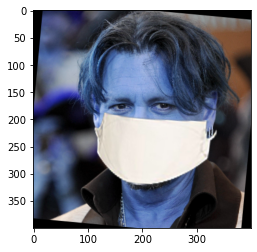

In [12]:
plt.imshow(rotated1)


## 마스크 영역 추출


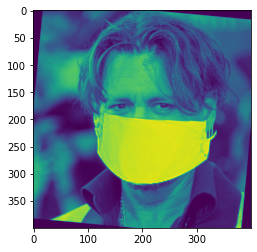

In [13]:
gray = cv2.cvtColor(rotated1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [14]:
faces = face_cascade.detectMultiScale(gray,1.1,4)
for (x,y,w,h) in faces:
    cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),2) #cv2.rectangle(img, start, end, color, thickness)
    black=np.zeros([400,400],dtype='uint8')
    black[y:y+h, x:x+w]=gray[y:y+h, x:x+w]
    
eyes =eye_cascade.detectMultiScale(black,1.1,4)    
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(black,(ex,ey),(ex+ew,ey+eh),(255,255,255),2)
cv2.imshow('img',black)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
eyes

array([[211, 155,  42,  42],
       [139, 153,  44,  44]], dtype=int32)

In [16]:
eye_1=eyes[0]
eye_2=eyes[1]

if eye_1[0] < eye_2[0]:
    left_eye = eye_1
    right_eye = eye_2
else:
    left_eye = eye_2
    right_eye = eye_1

In [17]:
left_eye
right_eye

array([211, 155,  42,  42], dtype=int32)

In [18]:
left_center=(int(left_eye[0]+(left_eye[2]/2)),int(left_eye[1]+(left_eye[3]/2)))
right_center=(int(right_eye[0]+(right_eye[2]/2)),int(right_eye[1]+(right_eye[3]/2)))

In [19]:
L=int(sqrt(pow(left_center[0]-right_center[0],2)+pow(left_center[1]-right_center[1],2)))

In [20]:
imgg=rotated1[left_center[1]-int(L*0.6):left_center[1]+int(L*1.8),left_center[0]-int(L*0.6):right_center[0]+int(L*0.6)]

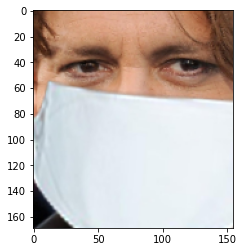

In [21]:
plt.imshow(imgg[:,:,::-1])

In [22]:
res=imgg[:,:,::-1]
res=cv2.resize(res,(120,140))
fin=res[50:140,0:120]

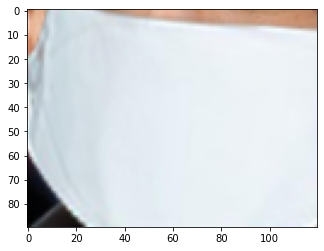

In [23]:
plt.imshow(fin)